Question: What is the relationship between a Colorado city’s population size and the number of restaurants it has, and how strongly can population predict restaurant counts as measured by the correlation coefficient and coefficient of determination?

I will conduct a descriptive correlational study examining the relationship between city population and the number of restaurants in Colorado. To do this, I will collect data on all Colorado cities where restaurant counts are available, using population figures from the U.S. Census Bureau and restaurant counts from sources such as Yelp, Google Places, and Foodylytics. 

A scatterplot with a line of best fit will be used to predict the expected number of restaurants in a city of a given size, such as one with 200,000 residents, and to demonstrate how population size relates to restaurant density. 

The dataset combines official census population statistics with restaurant counts curated by Foodylytics, which aggregates data from multiple industry sources while making decisions about what qualifies as a restaurant. This process may exclude food trucks, ghost kitchens, or unregistered businesses and risks both undercounting small independent eateries and overcounting establishments listed on multiple platforms. 

Several potential biases are inherent in this dataset, including selection bias from the exclusion of smaller towns, definition bias arising from differing interpretations of what constitutes a restaurant, geographic bias due to tourist destinations having unusually high restaurant density relative to permanent residents, and time bias since openings and closures can quickly change the accuracy of the data.


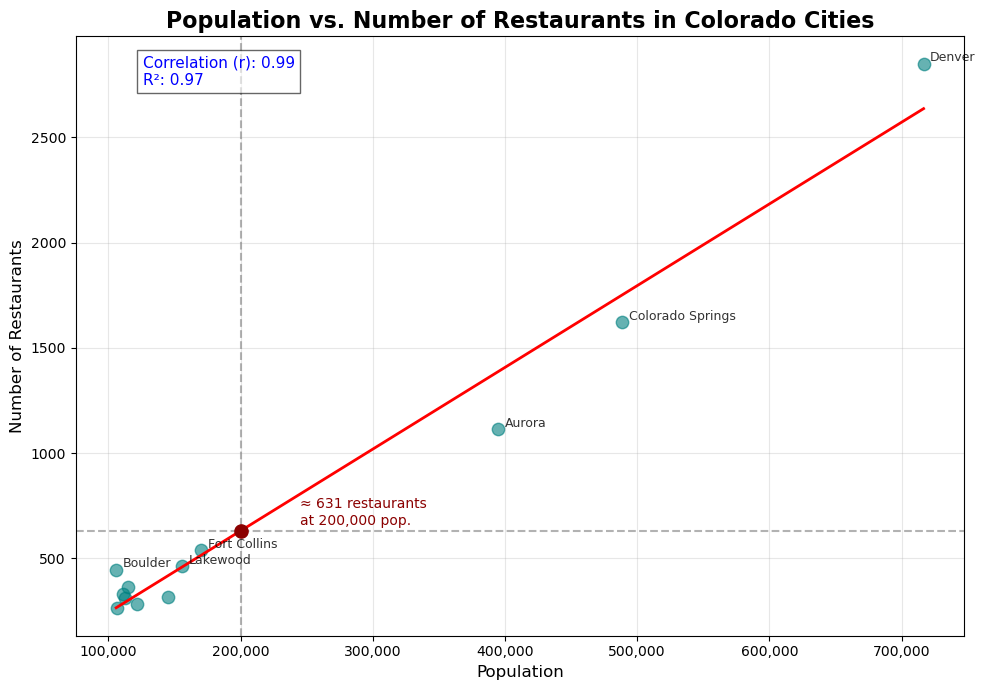

 --- Population Outliers ---


,City,Population
0,Denver,"716,577"
1,Colorado Springs,"488,664"


 --- Restaurant Outliers ---


,City,Restaurants
0,Denver,"2,850"
1,Colorado Springs,"1,621"


 --- Regression Results --- 


,Metric,Value
0,Correlation (r),0.986
1,R²,0.972
2,"Predicted Restaurants (at 200,000 pop.)",631


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.ticker as mtick

# Function to detect outliers and show city names
def detect_outliers_with_cities(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][["City", column]].copy()
    outliers[column] = outliers[column].apply(lambda x: f"{x:,}")  # format numbers with commas
    outliers.reset_index(drop=True, inplace=True)
    return outliers

# Step 1: Load data 
data = {
    "City": ["Denver", "Colorado Springs", "Aurora", "Fort Collins", "Lakewood",
             "Boulder", "Westminster", "Pueblo", "Thornton", "Greeley", 
             "Arvada", "Centennial"],
    "Population": [716577, 488664, 395052, 170376, 155961,
                   105898, 114875, 111077, 144922, 112609,
                   121414, 106883],
    "Restaurants": [2850, 1621, 1115, 539, 465,
                    447, 364, 330, 316, 314,
                    282, 262]
}
df = pd.DataFrame(data)

# Step 2: Detect outliers (tables)
population_outliers = detect_outliers_with_cities(df, "Population")
restaurant_outliers = detect_outliers_with_cities(df, "Restaurants")

# Step 3: Fit regression model
X = df[["Population"]]
y = df["Restaurants"]
model = LinearRegression().fit(X, y)

# Correlation (r) and R²
r = df["Population"].corr(df["Restaurants"])
r2 = model.score(X, y)

# Prediction for 200,000 residents
pred_population = 200000
pred_restaurants = model.predict(pd.DataFrame({"Population": [pred_population]}))[0]

# Step 4: Visualization
plt.figure(figsize=(10,7))

sns.regplot(
    x="Population", y="Restaurants", data=df,
    ci=None,
    scatter_kws={"s": 80, "alpha": 0.6, "color": "teal"},
    line_kws={"color": "red", "linewidth": 2}
)

# Label selected cities
label_cities = ["Denver", "Colorado Springs", "Aurora", "Fort Collins", "Lakewood", "Boulder"]
for _, row in df.iterrows():
    if row["City"] in label_cities:
        plt.text(row["Population"] + 5000, row["Restaurants"] + 10, row["City"], fontsize=9, alpha=0.8)

# Highlight prediction point
plt.scatter(pred_population, pred_restaurants, color="darkred", s=90, zorder=5)
plt.axvline(pred_population, color="gray", linestyle="--", alpha=0.6)
plt.axhline(pred_restaurants, color="gray", linestyle="--", alpha=0.6)
plt.text(pred_population + 45000, pred_restaurants + 30, 
         f"≈ {pred_restaurants:.0f} restaurants\nat 200,000 pop.", 
         fontsize=10, color="darkred")

# Display correlation + R²
plt.text(df["Population"].min() + 20000, df["Restaurants"].max() - 100, 
         f"Correlation (r): {r:.2f}\nR²: {r2:.2f}", 
         fontsize=11, color="blue", bbox=dict(facecolor="white", alpha=0.6))

plt.title("Population vs. Number of Restaurants in Colorado Cities", fontsize=16, weight='bold')
plt.xlabel("Population", fontsize=12)
plt.ylabel("Number of Restaurants", fontsize=12)
plt.grid(alpha=0.3)
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter("{x:,.0f}"))

plt.tight_layout()
plt.show()
# plt.savefig("restaurants_vs_population.png", dpi=300)

# Step 5: Results as a table
results = pd.DataFrame({
    "Metric": ["Correlation (r)", "R²", f"Predicted Restaurants (at {pred_population:,} pop.)"],
    "Value": [f"{r:.3f}", f"{r2:.3f}", f"{pred_restaurants:.0f}"]
})

# Final Tables (for Jupyter this renders clean)
print(" --- Population Outliers ---")
display(population_outliers)

print(" --- Restaurant Outliers ---")
display(restaurant_outliers)

print(" --- Regression Results ---")
display(results)


For this analysis, I will not remove outliers.

Denver and Colorado Springs are the two largest cities in Colorado, so their populations and restaurant counts are naturally much higher than the others. While they are statistical outliers, they represent real and meaningful data points that reflect the urban concentration of people and food establishments in the state. Removing them would distort the true relationship between population and restaurant availability, especially since they account for a large share of Colorado's population.

The analysis shows a strong positive relationship between city population and the number of restaurants in Colorado cities, as indicated by a high correlation coefficient and R² value. Based on this model, a city with a population of 200,000 would be expected to have approximately 631 restaurants. This suggests that population size is a strong predictor of restaurant density in Colorado.